In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting - murali
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from tqdm import tqdm_notebook

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #importing matplotlib


In [4]:
img=cv2.imread("five.png",cv2.IMREAD_GRAYSCALE)


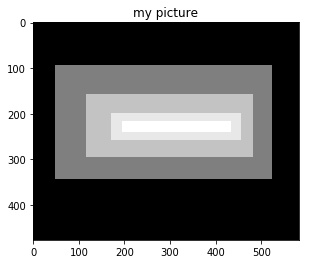

In [5]:
plt.imshow(img,cmap = plt.cm.gray)
plt.title('my picture')
plt.show()


In [6]:
np.unique(img)

array([  0, 127, 195, 232, 255], dtype=uint8)

In [7]:
def calc_unique(img):
    return np.unique(img)

In [8]:
def count_unique_(img):
    
    count_unique=dict()
    rows=img.shape[0]
    cols=img.shape[1]
    
    for row in range(rows):
        for col in range(cols):
            count_unique[img[row][col]]=count_unique.get(img[row][col],0)+1
            
    import operator
    print(sorted(count_unique.items(), key=operator.itemgetter(1)))
    
    
    count_unique = sorted(count_unique.items(), key=operator.itemgetter(1))
    
    
    
    print(count_unique)

    return count_unique

In [9]:
def find_background(count_unique):
    return count_unique[-1][0]

In [10]:
import operator
def binarize(img,count_unique,i):
    
    print("---binarize--")
    
    
    bg_color=find_background(count_unique)

    
    count_unique = count_unique[:-1]
    
    largest=count_unique[-1-i][0]
    smallest=count_unique[i+0][0]
    
    
    dup_count_unique=count_unique.copy()
    
#     dup_count_unique[largest]=largest
#     dup_count_unique[smallest]=smallest


    filler=dict()
    
    filler[largest]=largest
    filler[smallest]=smallest
    filler[bg_color]=bg_color
    
    for key,count in dup_count_unique:
        
        if key !=largest and key!=smallest:
            filler[key]= bg_color
            
            
            

    print(dup_count_unique)   
    print(filler)   
    
    rows=img.shape[0]
    cols=img.shape[1]
    new_img=img.copy()
    for row in range(rows):
        for col in range(cols):
            new_img[row][col]=filler.get(img[row][col],bg_color)
        
        
    return new_img

In [11]:
count_uniq=count_unique_(img)
final_image= binarize(img,count_uniq,0)

[(255, 5736), (232, 10736), (195, 33807), (127, 68245), (0, 159567)]
[(255, 5736), (232, 10736), (195, 33807), (127, 68245), (0, 159567)]
---binarize--
[(255, 5736), (232, 10736), (195, 33807), (127, 68245)]
{0: 0, 232: 0, 255: 255, 195: 0, 127: 127}


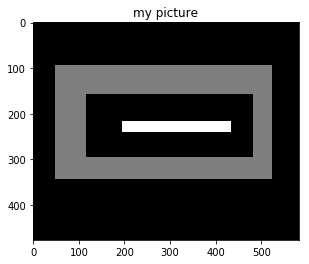

In [12]:
plt.imshow(final_image,cmap = plt.cm.gray)
plt.title('my picture')
plt.show()


In [13]:
cv2.imwrite("1st_level.png",final_image)

True

In [14]:
final_image2= binarize(img,count_uniq,1)

---binarize--
[(255, 5736), (232, 10736), (195, 33807), (127, 68245)]
{232: 232, 0: 0, 195: 195, 127: 0, 255: 0}


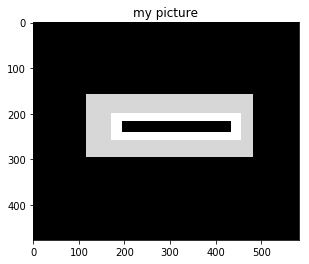

In [15]:
plt.imshow(final_image2,cmap = plt.cm.gray)
plt.title('my picture')
plt.show()


In [16]:
cv2.imwrite("2nd_level.png",final_image2)

True